In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2

In [4]:
labels = os.listdir("/content/drive/MyDrive/Dataset/train")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Dataset/train'

In [5]:
labels

NameError: name 'labels' is not defined

In [6]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("/content/drive/MyDrive/Dataset/train/Closed/_0.jpg"))

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Dataset/train/Closed/_0.jpg'

In [7]:
# prompt: I want to visualize random images from the dataset along with their labels

import matplotlib.pyplot as plt
import random

# Function to display random images with labels
def visualize_random_images(image_dir, num_images=5):
    """Visualizes random images from the dataset along with their labels.

    Args:
        image_dir (str): Path to the directory containing the images.
        num_images (int): Number of random images to visualize. Defaults to 5.
    """

    labels = os.listdir(image_dir)  # Get a list of all subdirectories (labels)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i in range(num_images):
        # Randomly select a label
        random_label = random.choice(labels)
        label_dir = os.path.join(image_dir, random_label)
        # Check if the selected label directory exists and contains images.
        if os.path.isdir(label_dir) and os.listdir(label_dir):
          # Get a list of image files within the randomly selected label directory
          image_files = [f for f in os.listdir(label_dir) if os.path.isfile(os.path.join(label_dir, f))]
          if image_files: # Check if there are image files in the directory

              # Randomly select an image file from the label directory
              random_image_file = random.choice(image_files)
              image_path = os.path.join(label_dir, random_image_file)

              # Read and display the image
              img = plt.imread(image_path)
              axes[i].imshow(img)
              axes[i].set_title(random_label)
              axes[i].axis('off')
        else:
            print(f"Warning: Label directory '{label_dir}' is empty or does not exist. Skipping.")
            continue

    plt.show()


# Example usage:
visualize_random_images("/content/drive/MyDrive/Dataset/train")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Dataset/train'

In [8]:
def face_for_yawn(direc="/content/drive/MyDrive/Dataset/train", face_cas_path="/content/drive/MyDrive/Dataset/prediction_images/haarcascade_frontalface_default.xml"):
    yaw_no = []
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]
    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            face_cascade = cv2.CascadeClassifier(face_cas_path)
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
            for (x, y, w, h) in faces:
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                roi_color = img[y:y+h, x:x+w]
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                yaw_no.append([resized_array, class_num1])
    return yaw_no


yawn_no_yawn = face_for_yawn()

0


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Dataset/train/yawn'

In [ ]:
def get_data(dir_path="/content/drive/MyDrive/Dataset/train", face_cas="/content/drive/MyDrive/Dataset/prediction_images/haarcascade_frontalface_default.xml", eye_cas="/content/drive/MyDrive/Dataset/prediction_images/haarcascade.xml"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data

In [ ]:
data_train = get_data()

2
3


In [ ]:
def append_data():
    yaw_no = face_for_yawn()
    data = get_data()
    # Convert yaw_no and data to lists of lists before extending
    yaw_no = [list(item) for item in yaw_no]
    data = [list(item) for item in data]
    yaw_no.extend(data)

    # Convert the combined list to a NumPy array
    # Note: You may need to adjust the dtype if necessary
    return np.array(yaw_no, dtype=object)

In [ ]:
new_data = append_data()

0
1
2
3


In [ ]:
X = []
y = []
for feature, label in new_data:
    X.append(feature)
    y.append(label)

In [ ]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

In [ ]:
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

In [ ]:
len(X_test)

578

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Changed import statement to use tensorflow.keras.preprocessing.image
import tensorflow as tf

In [ ]:
import keras
keras.__version__

'3.8.0'

In [ ]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

In [ ]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 143, 143, 256)       │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 71, 71, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 69, 69, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 34, 34, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 14, 14, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │         100,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 495,140 (1.89 MB)

 Trainable params: 495,140 (1.89 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_generator, epochs=50, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator))

NameError: name 'model' is not defined

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

NameError: name 'history' is not defined

In [ ]:
model.save("drowiness_new6.h5")

NameError: name 'model' is not defined

In [ ]:
model.save("drowiness_new6.model")

NameError: name 'model' is not defined

In [ ]:
prediction = model.predict_classes(X_test)

In [ ]:
prediction

In [ ]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), prediction, target_names=labels_new))

In [ ]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]
IMG_SIZE = 145
def prepare(filepath, face_cas="../input/prediction-images/haarcascade_frontalface_default.xml"):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model("./drowiness_new6.h5")

In [ ]:
# prepare("../input/drowsiness-dataset/train/no_yawn/1068.jpg")
prediction = model.predict([prepare("../input/drowsiness-dataset/train/no_yawn/1067.jpg")])
np.argmax(prediction)

In [ ]:
prediction = model.predict([prepare("../input/drowsiness-dataset/train/Closed/_101.jpg")])
np.argmax(prediction)

In [ ]:
prediction = model.predict([prepare("../input/drowsiness-dataset/train/yawn/113.jpg")])
np.argmax(prediction)

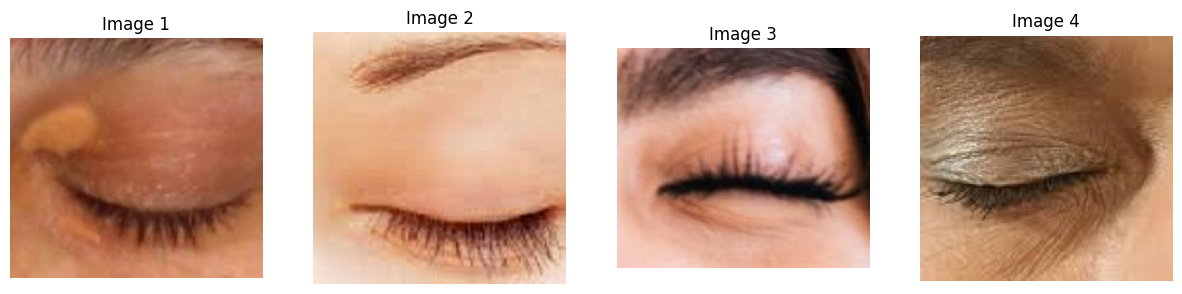

In [ ]:
# prompt: I want to print the first four images in closed label

import matplotlib.pyplot as plt
import os

# Assuming the image directory is the same as in your provided code
image_dir = "/content/drive/MyDrive/Dataset/train/Closed"

# Check if the directory exists
if not os.path.exists(image_dir):
    print(f"Error: Directory '{image_dir}' not found.")
else:
    # Get a list of image files in the directory
    image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

    # Check if there are enough images to display
    num_images_to_display = min(4, len(image_files))

    if num_images_to_display == 0:
        print("Error: No images found in directory.")

    else:
        # Create subplots for the images
        fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 5))

        # Display the first four images
        for i in range(num_images_to_display):
            image_path = os.path.join(image_dir, image_files[i])
            img = plt.imread(image_path)
            axes[i].imshow(img)
            axes[i].set_title(f"Image {i+1}")  # Set a title for each image
            axes[i].axis('off') # Hide axes

        plt.show()
